#🤿 **IMERSÃO DE DADOS - ALURA**

## AULA 1 | Python e Pandas e o problema fármaco

<br> 

🎞️ [YOUTUBE](https://www.youtube.com/watch?v=xGT2cuu5RPg&list=WL&index=4&t=1396s)
com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 


## 💉 **DADOS**

[Desafio original no Kaggle](https://www.kaggle.com/c/lish-moa)

<br>

Coluna| Tipo de Dado | Descrição
------|--------------|----------
*tratamento*| categórico | indica se houve o uso de droga (`com_droga`) ou não (`com_controle`)
*tempo* | numérico | intervalo entre o momento de aplicação de uma droga até o momento de avaliação de seu efeito, comumento chamado de **tempo de exposição**
*dose* | categórico | considerado que **D1** refere-se a uma dose menor e que **D2** refere-se a uma dose maior
*droga* | categórico | os dados foram anonimizados para remover o viés da análise e possíveis questões éticas
*g0-n* | numérico | expressão de cada um dos genes em relação a droga e/ou dose.(Dados provavelmente normalizados)
*c0-n* | numérico | tipo celular(linhagem celular)


#### 📒 Vocabulário
 

*   **Genes**: são trechos do DNA com a capacidade de sintetizar uma proteína.
*   **RNA mensageiro (mRNA)**: carrega a informação de síntese da proteína do núcleo ao citoplasma celular.


 <hr>

Em uma **expressão gênica** normal, uma célula irá produzir 4 RNAs para produzir uma proteína. Essa célula poderá ser submetida a estímulos (internos ou externos), responsáveis por aumentar ou diminuir sua expressão gênica. 

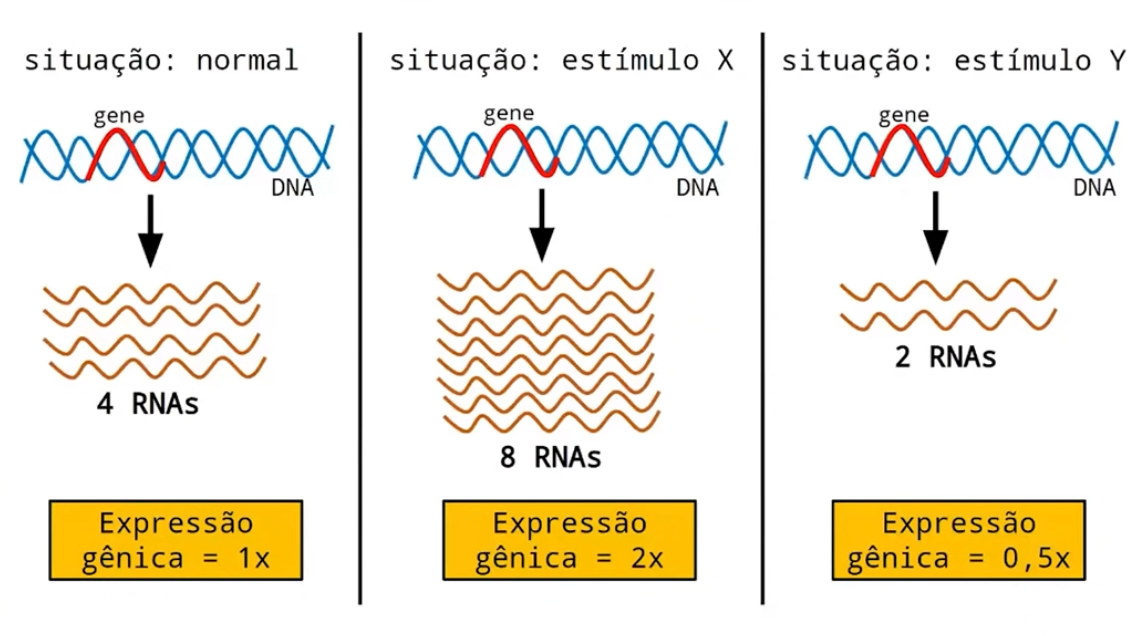

In [27]:
import pandas as pd

url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
data = pd.read_csv(url, compression = 'zip')

In [28]:
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [29]:
data.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [30]:
data.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

Identificando as categorias dos atributos categóricos

In [31]:
for col in data.select_dtypes(include='object'):
  print(f'{col} : {data[col].unique()}\n')

id : ['id_000644bb2' 'id_000779bfc' 'id_000a6266a' ... 'id_fffc1c3f4'
 'id_fffcb9e7c' 'id_ffffdd77b']

tratamento : ['com_droga' 'com_controle']

dose : ['D1' 'D2']

droga : ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']



Analisando os dados de tratamento

In [32]:
data['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

#### **Desafio 01** | Investigar por que a classe tratamento é tão desbalanceada? 

In [33]:
data_treatment = data.loc[:,'tratamento':'droga']

**Avaliando tratamentos `com controle`** 

Todos os tratamentos avaliados **com_controle** utilizaram a mesma droga, identificada como `cacb2b860`. É possível observar que houve uma distribuição homogênea entre os grupos de tempo e dose, com um pequeno aumento na aplicação da dose D1 com taxa de exposição de 48 horas. 

In [34]:
data_treatment[data.tratamento == 'com_controle'].value_counts().sort_index()

tratamento    tempo  dose  droga    
com_controle  24     D1    cacb2b860    301
                     D2    cacb2b860    305
              48     D1    cacb2b860    343
                     D2    cacb2b860    305
              72     D1    cacb2b860    307
                     D2    cacb2b860    305
dtype: int64

**Analisando tratamentos `com_drogas`**

É possível observar que assim como os tratamentos `com_controle`, existe uma distribuição praticamente homogênea entre os grupos. 

Contamos com o teste de **3289 drogas** que, se fosem combinadas considerando a variação de tempo e dosagem proposta, seriam necessários **19.734 amostras**. A amostragem obtida no experimento é **2.214 amostras maior**, o que equivale a um acréscimo de 10,09%. 

No caso, vemos um **número maior de testes para dose D1 e o tempo de exposição de 48h**, assim como ocorreu nos tratamentos com_controle. Isso pode indicar uma maior variedade do atributo de estudo que esteja relacionado a condição. 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
with_drugs = data_treatment[data.tratamento == 'com_droga'].loc[:,'tempo':'droga']

In [37]:
drugs_time_eval = with_drugs.set_index('droga').groupby('tempo').count().reset_index()
drugs_time_eval = drugs_time_eval.sort_values(by = 'dose', ascending = False)
drugs_time_eval.reset_index(inplace=True, drop=True)
drugs_time_eval

,tempo,dose
0,48,7602
1,72,7180
2,24,7166


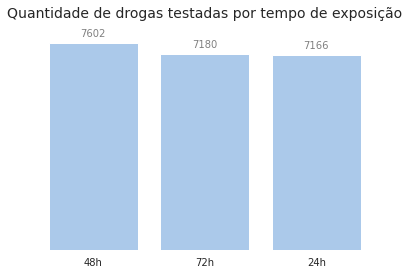

In [38]:
sns.set_color_codes('pastel')
sns.barplot(x = drugs_time_eval['dose'].index, y = drugs_time_eval['dose'].values, color='b')
plt.title('Quantidade de drogas testadas por tempo de exposição', pad = 15, fontsize = 14)
plt.xticks(ticks = drugs_time_eval.index, labels = ['48h', '72h', '24h'] )
plt.yticks(ticks = [])
plt.xlabel(xlabel ='')

for i in range(3):
  space = 250
  s = drugs_time_eval['dose'].values[i]
  xy = (i, drugs_time_eval['dose'].values[i] + space )
  plt.annotate(s, xy, ha='center', color = 'gray')

sns.despine(left = True, bottom = True)

In [39]:
with_drugs.set_index('droga').groupby('dose').count()

drugs_dose_eval = with_drugs.set_index('droga').groupby('dose').count().reset_index()
drugs_dose_eval = drugs_dose_eval.sort_values(by = 'tempo', ascending = False)
drugs_dose_eval.reset_index(inplace=True, drop=True)
drugs_dose_eval

,dose,tempo
0,D1,11196
1,D2,10752


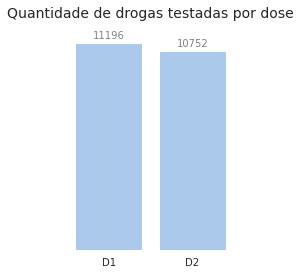

In [61]:
f,ax = plt.subplots(figsize = (3,4))
sns.set_color_codes('pastel')
sns.barplot(x = drugs_dose_eval['tempo'].index, y = drugs_dose_eval['tempo'].values, color='b')
plt.title('Quantidade de drogas testadas por dose', pad = 15, fontsize = 14)
plt.xticks(ticks = drugs_dose_eval.index, labels = ['D1', 'D2'] )
plt.yticks(ticks = [])
plt.xlabel(xlabel ='')

for i in range(2):
  space = 250
  s = drugs_dose_eval['tempo'].values[i]
  xy = (i, drugs_dose_eval['tempo'].values[i] + space )
  plt.annotate(s, xy, ha='center', color = 'gray')

sns.despine(left = True, bottom = True)

In [41]:
drugs_count = data['droga'].unique().size
print(f'Quantidade de drogas: {drugs_count}')

Quantidade de drogas: 3289


In [42]:
min_drug_sample = drugs_count * 2 * 3
print(f'Quantidade mínima de amostras para cada droga: {min_drug_sample}')

Quantidade mínima de amostras para cada droga: 19734


In [43]:
print(f'Relação com a amostragem real: {with_drugs.shape[0] - min_drug_sample} | {round((1- min_drug_sample/ with_drugs.shape[0]) * 100,2)}%')

Relação com a amostragem real: 2214 | 10.09%


#### **Desafio 02** | Deixar os gráficos bonitos

Embora a prosposta dos educadores tenha sido utilizar a biblioteca matplotlib, preferi utilizar o seaborn apenas por considerar que a estética é melhor. 

Ainda, optei por utilizar barras horizontais em relação as barras verticais. Isso porque os títulos utilizados eram longos para o espaço destinado. Na configuração padrão, seriam mostrados com uma inclinação de 90°, o que dificultaria a leitura do gráfico. Se alterados para a posição horizontam precisariam ser abreviados,podendo comprometer o entendimento da categoria. 

#### **Desafio 03** | Calcular a proporção das classes tratamento 

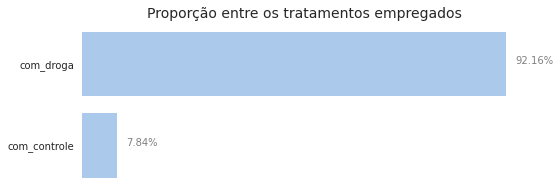

In [44]:
treatment = data['tratamento'].value_counts(normalize = True)

#define a cor do fundo do gráfico
sns.set_style("white")

#configurações do gráfico
f,ax = plt.subplots(figsize = (8,3))
sns.set_color_codes('pastel')
sns.barplot(y = treatment.index, x = treatment.values, color='b', orient ='h')
plt.title('Proporção entre os tratamentos empregados', pad = 5, fontsize = 14)
plt.xticks(ticks=[])

#adicionar valores nas barras horizontais
for p in ax.patches:
  space = 0.02
  _x = p.get_x() + p.get_width() + float(space)
  _y = p.get_y() + p.get_height()/2
  value = f'{round(float(p.get_width()) * 100, 2)}%'
  ax.text(_x, _y, value, ha='left', color = 'gray')

#remover o eixo vertical
sns.despine(left = True, bottom = True)

#### **Desafio 04** | Quantas tipos de drogas foram investigadas?

In [45]:
data['droga'].unique().size

3289

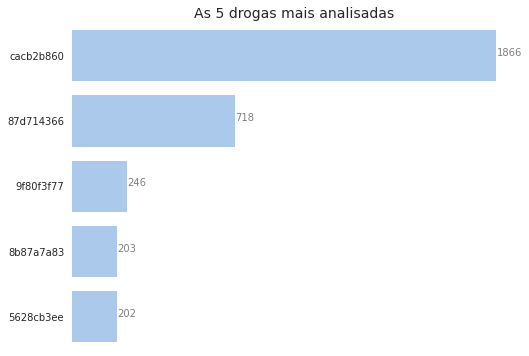

In [46]:
top_drugs = data['droga'].value_counts().nlargest(5)

sns.set_style("white")

#configurações do gráfico
f,ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(y= top_drugs.index, x=top_drugs.values, color='b', orient ='h')
plt.title('As 5 drogas mais analisadas', pad=5, fontsize=14)
plt.xticks(ticks=[])

#adicionar valores nas barras horizontais
for p in ax.patches:
  space = 0.8
  _x = p.get_x() + p.get_width() + float(space)
  _y = p.get_y() + p.get_height()/2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha='left', color = 'gray')

#remover o eixo vertical
sns.despine(left = True, bottom = True)


#### **Desafio 05** | Quais são os dados que possuem o atributo g-0 maiores que zero?

Nesse desafio, estava-se considerando que os números acima de zero poderiam representar um aumento da expressão gênica. Seria necessário mais informações para confirmar essa suposição.

In [47]:
data[data['g-0'] > 0]

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.55

Pode-se observar que existem **11.769 amostras** com valores g-0 maiores que zero.

Esse mesmo resultado poderia ser obtido utilizando o método `query` . Mas para isso, será preciso renomear a coluna devido a um problema de interpretação da biblioteca de nomes com caracter `-`

#### **Desafio 06** | Renomear as colunas tirando o hífen

In [48]:
data.columns = data.columns.map(lambda col: col.replace('-', ''))

In [49]:
data.query('g0 > 0')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,-0.

#### **Desafio 07** | Resumo do aprendizado

Os dados referem-se a um estudo comparativo do estimúlos de 3.289 drogas em relação a droga cacb2b860 quanto a síntese de proteínas celular em 100 genes diferentes. 

Como não se tem certeza do significado dos dados apresentados em relação aos genes, sua análise seria um equivocada.

Existe indícios que apontam um maior interesse e/ou esforço em relação as amostras com tempo de exposição de 48h relacionadas a dose D1.

#🤿 **IMERSÃO DE DADOS - ALURA**

## AULA 2 | Estatística, visualização de dados e distribuições

<br> 

🎞️ [YOUTUBE](https://www.youtube.com/watch?v=lMzhxPrIxHU&list=WL&index=1&t=199s)
com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 


A **Vanessa Leiko**, especialista em genética, informou no início da segunda aula que não existem 3.289 drogas. Com isso, sugeriu que o nome fosse alterado de `drogas` para `compostos`. 

<br>

#### 📒 Vocabulário
- **Compostos**: são pequenas moléculas sob estudo que podem vir a se tornar drogas. 


In [24]:
data.rename(columns={'droga': 'composto'}, inplace=True)
data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Como são muitos compostos sendo avaliados, assim como havia feito na aula passada, o instrutor **Thiago** buscou apresentar graficamente apenas os 5 compostos mais frequentes no estudo. Contudo ele utilizou uma lógica diferente da que havia utilizado, criando um conjunto com os nomes das drogas e posteriormente, aplicando uma query.

In [25]:
little_cels_code = data['composto'].value_counts().index[0:5]
query_top_5 = data.query('composto in @little_cels_code')

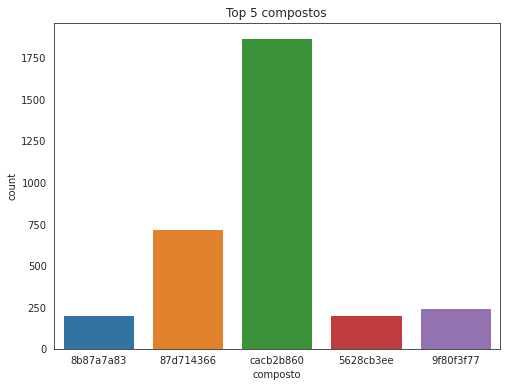

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data = query_top_5)
ax.set_title('Top 5 compostos')
plt.show()

#### **Desafio 01** | Ordernar o gráfico construído pelo countplot e melhorar sua visualização

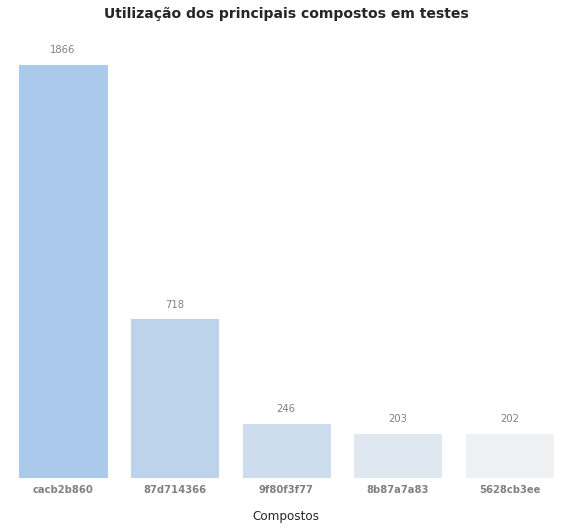

In [145]:
plt.figure(figsize=(10, 8))
sns.set_color_codes('pastel')
ax = sns.countplot(x = 'composto', data = query_top_5, order= little_cels_code, palette="light:b_r")
plt.title('Utilização dos principais compostos em testes', pad = 25, fontsize = 14, fontweight ='bold')
plt.xlabel('Compostos', fontsize = 12, labelpad=15 )
plt.ylabel('')
plt.xticks(fontweight='bold', color='gray')
plt.yticks(ticks=[])

for p in ax.patches:
  space = 50
  s = str(p.get_height())
  xy = (p.get_x() + p.get_width()/2, p.get_height() + space )
  plt.annotate(s, xy, ha='center', color = 'gray')

sns.despine(left = True, bottom = True)

### 🧬 Analisandos os dados de expressão genética

Como as expressões genéticas estudadas são muitas(14.367 variações) e representam valores numéricos contínuos, será utilizado [histogramas](https://www.alura.com.br/artigos/o-que-e-um-histograma?utm_source=gnarus&utm_medium=timeline) como representação gráfica. 


In [51]:
len(data['g0'].unique())

14367

🐾 *Passos para a construção de um histograma:*

1. Identificar qual o **valor mínimo** (min()) e o **valor máximo** (max()) para entender qual o intervalo númerico com o qual estamos trabalhando.

2. Determinar a **quantidade de intervalos de classe(bins)** que serão apresentados no histograma.

*Nota: Não foi possível inserir diretamente na função print o cálculo do mínimo e máximo, provavelmente devido ao nome da coluna incluir um caracter numérico.*

In [66]:
min = data['g0'].min()
max = data['g0'].max()
print(f'Mínimo: {min} | Máximo: {max}')

Mínimo: -5.513 | Máximo: 10.0


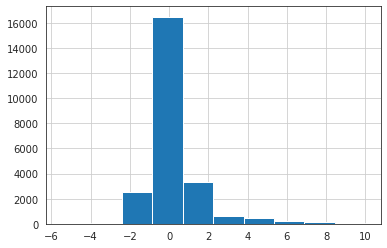

In [76]:
data['g0'].hist()

Os dados estão muito agrupados utilizando a função de histograma sem determinar o intervalo de classe. Foi então sugerido adotar o valor 100.

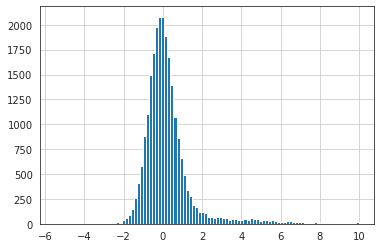

In [77]:
data['g0'].hist(bins = 100)

Embora essa alteração permita visualizar o comportamento normal da curva, esse palpite poderia requere muito tempo e/ou experiência do analista. Deve haver outras formas de ser mais acertivo...

#### **Como determinar a quantidade de bins ❓**
Embora não tenha sido mencionado em aula e apenas surgiu o número mágico 100 como um bom valor, é possível realizar uma estimativa de qual valor poderia ser o mais indicado. Para isso, será utilizado um método que pode ser encontrado na íntegra nesse [site](https://www.statisticshowto.com/choose-bin-sizes-statistics/)

**Regra de Sturge** | 
utilizada quando os dados são contínuos, normalmente distribuídos e simétricos.

```
        K = 1 + 3.322 logN
```

onde:
- K = Número de intervalos de classe(bins)
- N = Número de observações

In [75]:
import math

K = 1 + 3.322 * math.log(data['g0'].unique().size)
int(round(K,0))

33

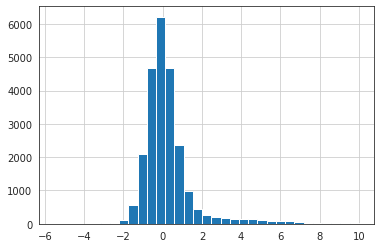

In [79]:
data['g0'].hist(bins = 33)

Temos **772 variações de experessões genéticas** nos dados (g0 a g771). Por isso, construir um histograma para cada uma delas seria inviável. Contudo, ainda é possível avaliarmos em conjunto.


In [82]:
sum([True for col in data.columns.values if col.startswith('g')])

772

In [84]:
data.loc[:, 'g0': 'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

#### **Desafio 03** | Estudar sobre as estatísticas retornadas no describe


[Artigo](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe)



Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas.

Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o ```describe()``` que fizemos a partir do ```loc[]``` e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).
Para isso, vamos usar o ```.T[]``` no código anterior que produzimos para organizar o ```describe()```.

Ou seja, vamos manter todo o código até o ```describe()``` e, ao final, acrescentaremos o ```.T[]```. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do ```.T[]``` a estatística alvo (```.T['estatística']```) e, por último, acrescentamos o ```.hist(bins = número de quebras)``` para que o histograma seja observado.

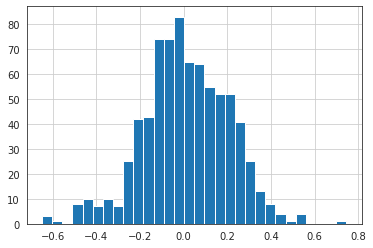

In [85]:
data.loc[:, 'g0': 'g771'].describe().T['mean'].hist(bins = 30)

A seguir, reproduzimos o código acima apenas alterando o parâmetro estatístico a ser analisado (mínimo e máximo, por exemplo). 
E assim, podemos perceber as nuances de cada métrica.

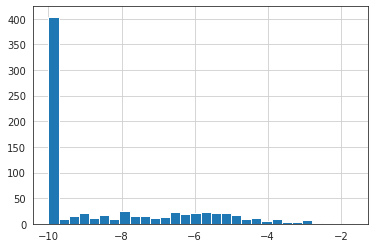

In [87]:
data.loc[:,'g0':'g771'].describe().T['min'].hist(bins=30)

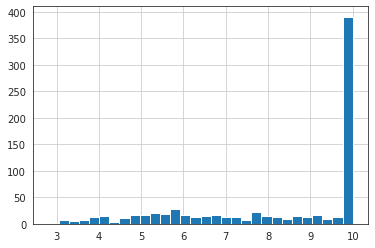

In [88]:
data.loc[:,'g0':'g771'].describe().T['max'].hist(bins=30)

#### **Desafio 02** | Plotar os histogramas com seaborn

O **boxplot** apresenta uma caixa no meio onde podemos identificar a **mediana** (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os **outliers** (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - **primeiro quartil (25%)** e **terceiro quartil (75%)**) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal). O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.
[Artigo](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot)


> 💡 **Dica do instrutor Thiago**

```
BOXPLOT VERTICAIS são úteis para fazer comparações com os histogramas. 
Enquanto BOXPLOT HORIZONTAIS são úteis para comparar atributos entre si.
```



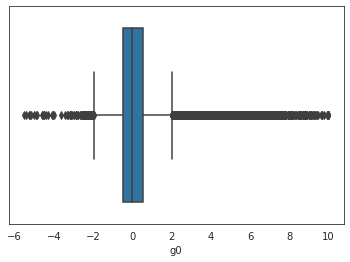

In [89]:
sns.boxplot(x='g0', data=data)

É possível perceber que existem muitos outliers nos dados de tratamentos `com_drogas`. Do ponto de vista biológico, a investigação desses pontos podem representar uma possível solução. Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados, mas também saver acerca do negócio que estamos tratando.

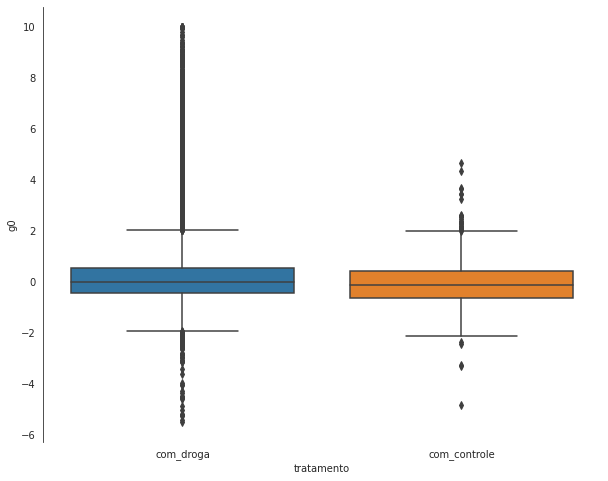

In [92]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', x='tratamento' , data = data)
sns.despine(bottom = True)

#### **Desafio 04** | Refletir sobre a manipulação do tamanho das visualizações

#### **Desafio 05** | Fazer outras análises com o boxplot e com o histograma

#### **Desafio 06** | Resumo do que você aprendeu com os dados